In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

In [3]:
gr1 = pd.read_csv('gr1.csv')
sin = pd.read_csv('sin_m3-9_Xis0_Full_2mW_30s 2023 June 19 16_17_33.csv')
sio= pd.read_csv('sio_m3-9_Xis0_Full_2mW_30s 2023 June 20 11_29_23.csv')
bkg= pd.read_csv('sin_m3-10_offSquare_Full_2mW_30s 2023 June 19 16_42_38.csv')
gallium = pd.read_csv('gallium_data.csv')

shift = 1.8

norm_peak_min = 550
norm_peak_max = 575



In [4]:
def bkg_norm(data):
    minValue = min(data['I'])
    return (data['I']-minValue)/(data['I'][findarg(data['W'], norm_peak_min)+np.argmax(data['I'][findarg(data['W'], norm_peak_min):findarg(data['W'], norm_peak_max)])] - minValue)

In [5]:
np.argmax(gr1['I'][findarg(gr1['W'], 612):findarg(gr1['W'], 616)])
findarg(gr1['W'], 612)

592

In [6]:
gr1

,W,I
0,560.045753,662
1,560.133734,661
2,560.221716,636
3,560.309696,657
4,560.397677,637
...,...,...
3313,849.680851,2291
3314,849.767756,2258
3315,849.854661,2270
3316,849.941564,2251


(0.0, 0.2)

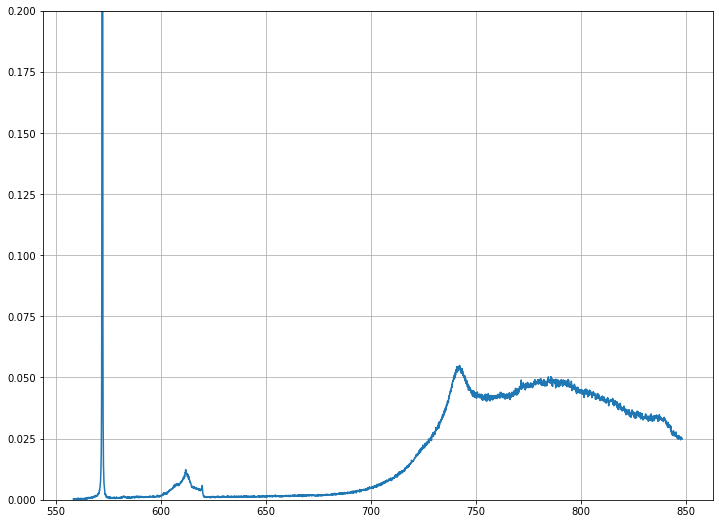

In [7]:
plt.figure(figsize=(12,9))
plt.grid()
y1 = bkg_norm(gr1)

y1[findarg(gr1['W'],624.4)]= y1[findarg(gr1['W'],624.2)]
x1 = gr1['W']- shift
plt.plot(x1,y1)
plt.ylim([0,0.2])

(0.0, 0.2)

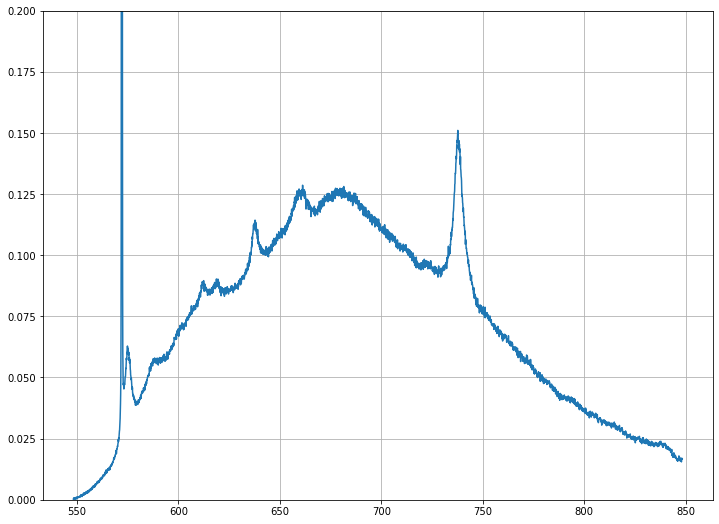

In [8]:
plt.figure(figsize=(12,9))
plt.grid()
minValue = min(sin['I'])
y2 = (sin['I']-minValue)/(sio['I'][findarg(sio['W'], norm_peak_min)+np.argmax(sio['I'][findarg(sio['W'], norm_peak_min):findarg(sio['W'], norm_peak_max)])] - minValue)
x2 = sin['W']- shift
plt.plot(x2,y2)
plt.ylim([0,0.2])

(0.0, 0.2)

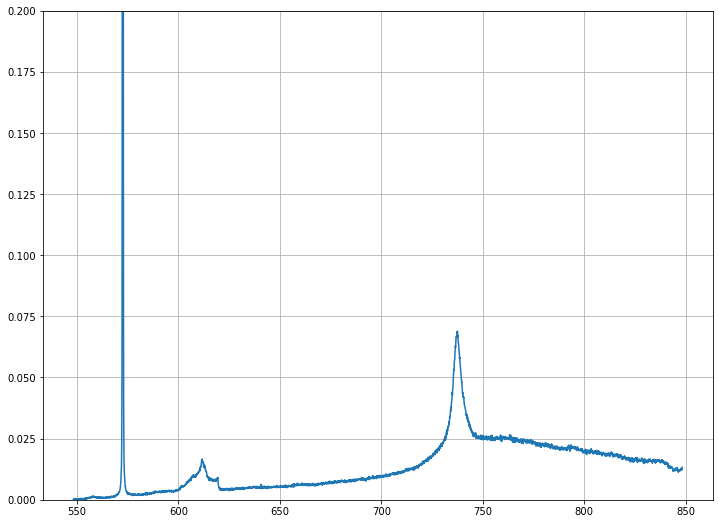

In [9]:
plt.figure(figsize=(12,9))
plt.grid()
y3 = bkg_norm(sio)
x3 = sio['W']- shift
plt.plot(x3,y3)
plt.ylim([0,0.2])

(0.0, 0.2)

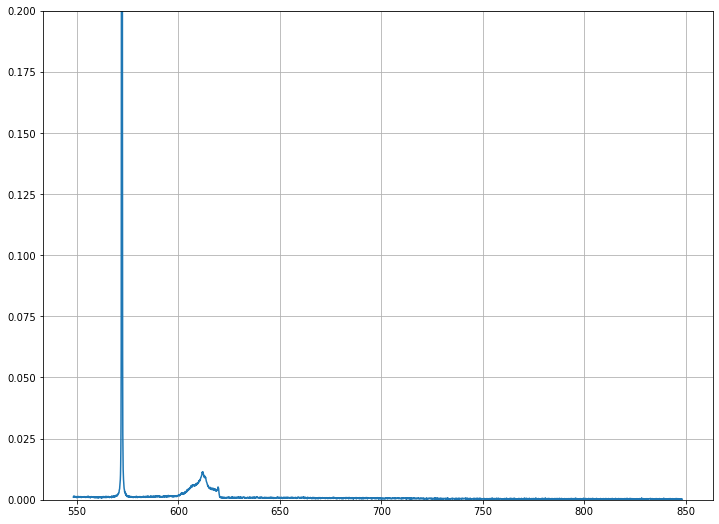

In [10]:
plt.figure(figsize=(12,9))
plt.grid()
y4 = bkg_norm(bkg)
x4 = bkg['W']- shift
plt.plot(x4,y4)
plt.ylim([0,0.2])

(0.0, 0.2)

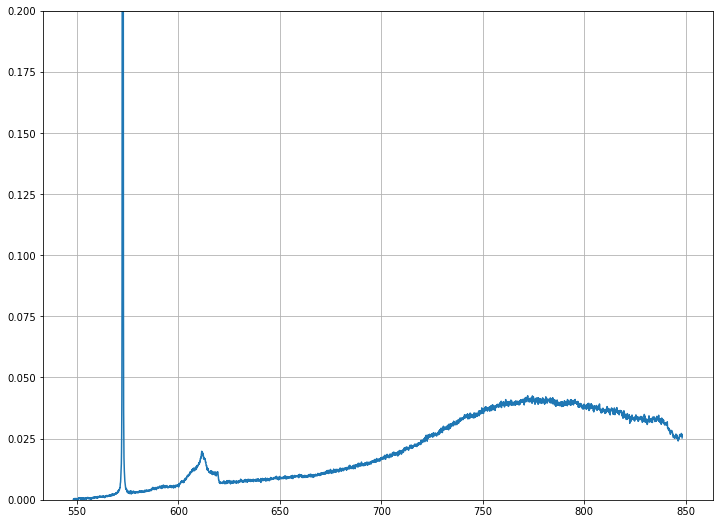

In [11]:
plt.figure(figsize=(12,9))
plt.grid()
y5 = bkg_norm(gallium)
x5 = gallium['W']- shift
plt.plot(x5,y5)
plt.ylim([0,0.2])

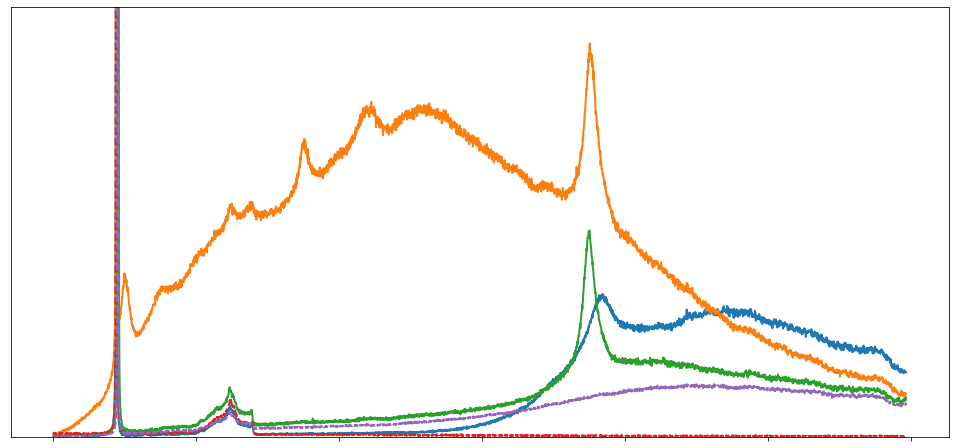

In [12]:
# plt.rcParams.update({'font.size': 22})
# cm = 1/2.54 
# fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
# plt.plot(x1[20:],y1[20:]*1.6,linewidth=2)
# plt.plot(x2[20:],y2[20:], linewidth=2)
# plt.plot(x3[20:],y3[20:]*1.25, linewidth=2)
# plt.plot(x4[20:],y4[20:]*1.6, '--', linewidth=2)
# # plt.plot(x5[20:],y5[20:]*0.56, '--', linewidth=2)
# plt.ylim([0,0.165])
# plt.yticks([])
# plt.xticks([550,600,650,700,750,800,850],['','','','','','',''])
# fig.savefig('RTspectrum_regular.svg', format= 'svg',transparent=True)

plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.plot(x1[20:],y1[20:],linewidth=2)
plt.plot(x2[20:],y2[20:], linewidth=2)
plt.plot(x3[20:],y3[20:]*1.15, linewidth=2)
plt.plot(x4[20:],y4[20:]*1.15*1.1, '--', linewidth=2)
plt.plot(x5[20:],y5[20:]*0.44*1.1, '--', linewidth=2)
plt.ylim([0,0.165])
plt.yticks([])
plt.xticks([550,600,650,700,750,800,850],['','','','','','',''])
fig.savefig('RTspectrum_regular.svg', format= 'svg',transparent=True)

In [13]:
sio['I'][len(sio['I'])-1]

942

In [14]:
sin['I'][len(sin['I'])-1]

1326